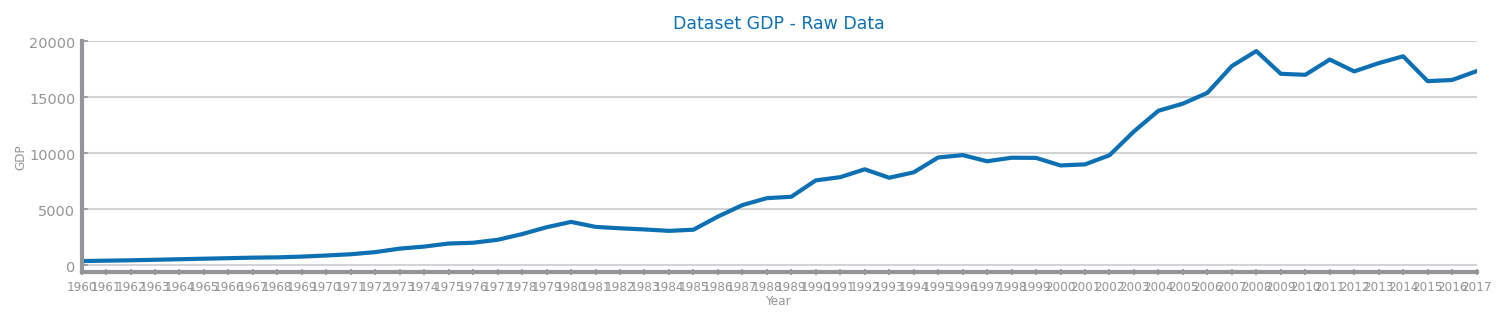

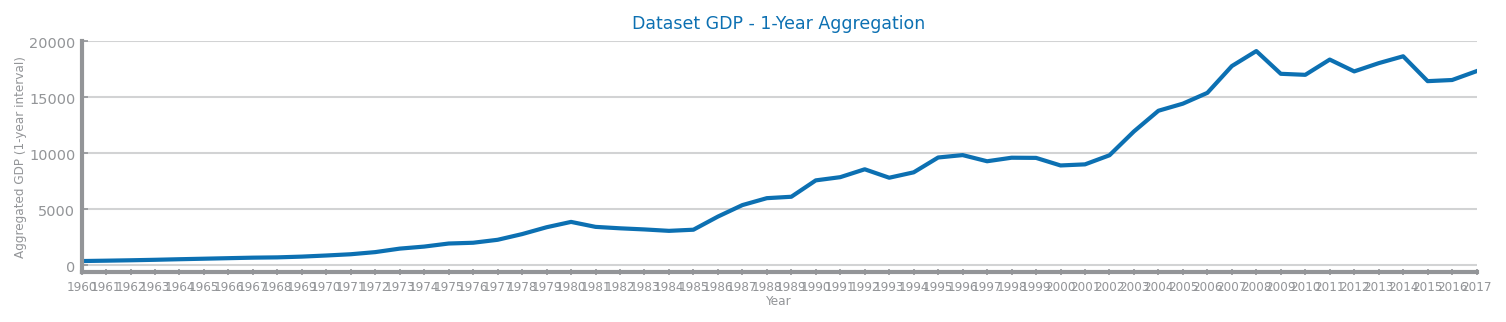

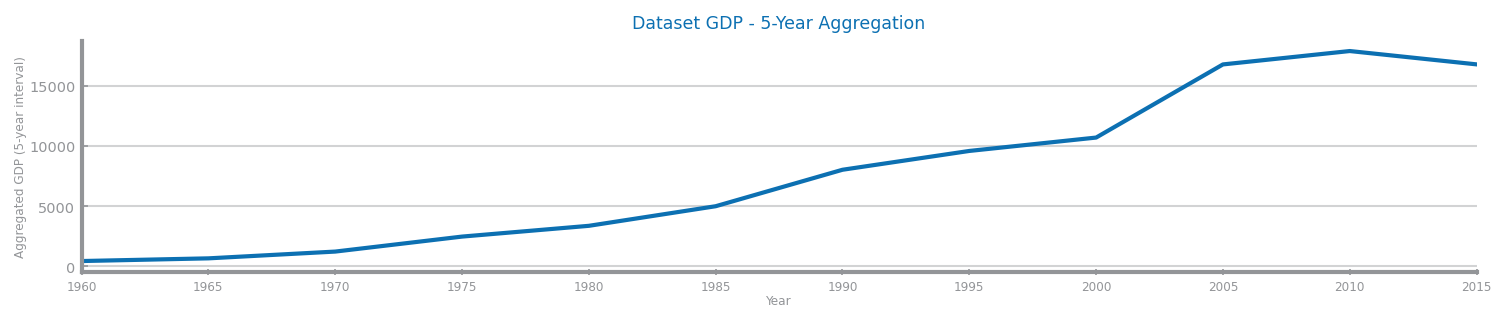

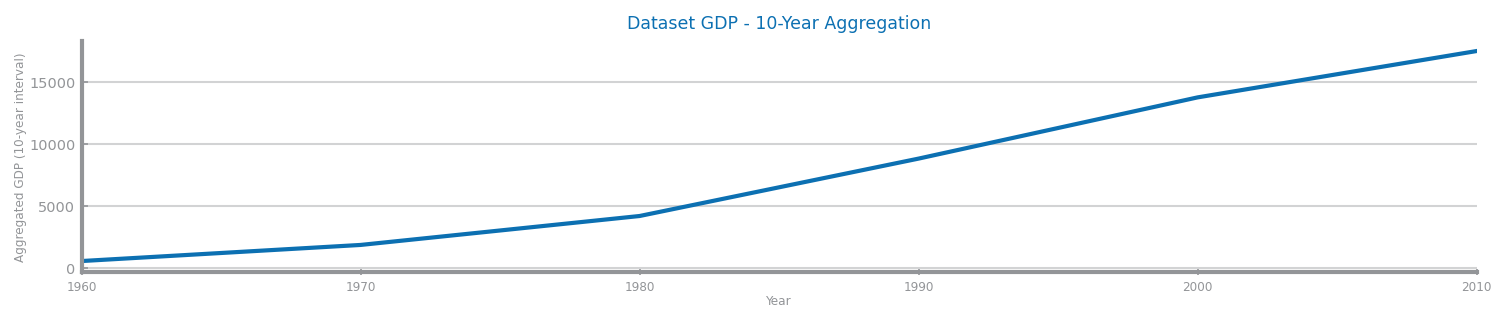

In [16]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, subplots
from pathlib import Path
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT

# File configurations
file_tag = "Dataset"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
output_dir = Path("output/aggregations")
output_dir.mkdir(parents=True, exist_ok=True)
index = "Year"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=False,
    infer_datetime_format=False,
)

# Function to aggregate data by custom intervals
def aggregate_by_interval(data: DataFrame, interval: int) -> DataFrame:
    aggregated = data.groupby(data.index // interval).mean()
    aggregated.index = aggregated.index * interval  # Adjust the index to represent the interval start
    return aggregated

# Aggregations for 1 year, 5 years, and 10 years
intervals = [1, 5, 10]
aggregated_data = {interval: aggregate_by_interval(data, interval) for interval in intervals}

# Save aggregated datasets
for interval, aggregated_df in aggregated_data.items():
    output_path = output_dir / f"aggregated_{interval}_years.csv"
    aggregated_df.to_csv(output_path, index_label=index)

# Plot raw data for the target variable
target = "GDP"
series: Series = data[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel="Year",
    ylabel=target,
    title=f"{file_tag} {target} - Raw Data",
)
show()

# Plot aggregated data for the target variable
for interval, aggregated_df in aggregated_data.items():
    aggregated_series = aggregated_df[target]
    figure(figsize=(3 * HEIGHT, HEIGHT / 2))
    plot_line_chart(
        aggregated_series.index.to_list(),
        aggregated_series.to_list(),
        xlabel="Year",
        ylabel=f"Aggregated {target} ({interval}-year interval)",
        title=f"{file_tag} {target} - {interval}-Year Aggregation",
    )
    show()
